# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [11]:
import pandas as pd 
from palmerpenguins import load_penguins
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
penguins = load_penguins()
penguins.dropna(inplace=True)


In [5]:

pengu_clean = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
X = pengu_clean.drop(['bill_depth_mm'], axis = 1)
y = pengu_clean['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 52)

In [ ]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

interaction = PolynomialFeatures(degree= 3, include_bias=False)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
   ("interaction", interaction),
  ("lr", LinearRegression())]
)

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_train)

# mse = mean_squared_error(y_test, y_pred)
# print(f"MSE: {mse}")

y_train_pred = lr_pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

    
# Predict and calculate errors for test data
y_test_pred = lr_pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(train_mse)
print(test_mse)

MSE: 1.833868194054618
0.2045252135272984
1.833868194054618


In [24]:
### k = 5
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

#interaction = PolynomialFeatures(degree= 3, include_bias=False)

knn_pipeline = Pipeline(
  [("preprocessing", ct),
 #  ("interaction", interaction),
  ("knn", KNeighborsRegressor(n_neighbors=5))]
)

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"MSE: {mse}")

y_train_pred = knn_pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

    
# Predict and calculate errors for test data
y_test_pred = knn_pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(train_mse)
print(test_mse)


0.41334457831325316
0.7171714285714282


In [25]:
### k = 10
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

#interaction = PolynomialFeatures(degree= 3, include_bias=False)

knn_pipeline_1 = Pipeline(
  [("preprocessing", ct),
 #  ("interaction", interaction),
  ("knn", KNeighborsRegressor(n_neighbors=10))]
)

knn_pipeline_1.fit(X_train, y_train)

y_pred = knn_pipeline_1.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"MSE: {mse}")

y_train_pred = knn_pipeline_1.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

    
# Predict and calculate errors for test data
y_test_pred = knn_pipeline_1.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(train_mse)
print(test_mse)

0.5138831325301202
0.7560226190476187


In [26]:
dt_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("interaction", interaction),
        ("dt", DecisionTreeRegressor(max_depth=5))  # Adjust max_depth as needed
    ]
)

# Fit the pipeline
dt_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_pipeline.predict(X_test)

# Calculate MSE
# mse = mean_squared_error(y_test, y_pred)
# print(f"MSE: {mse}")

y_train_pred = dt_pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

    
# Predict and calculate errors for test data
y_test_pred = dt_pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(train_mse)
print(test_mse)

0.2957667040029507
1.0370128984049605


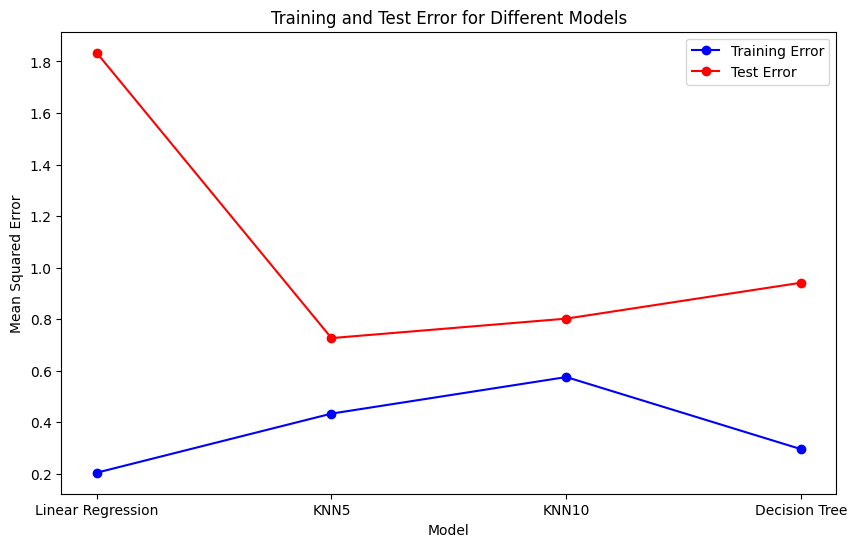

In [20]:
import matplotlib.pyplot as plt
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

interaction = PolynomialFeatures(degree=3, include_bias=False)

# Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "KNN5": KNeighborsRegressor(n_neighbors=5),
    "KNN10": KNeighborsRegressor(n_neighbors=10),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
}

# Initialize dictionaries to store errors
train_errors = []
test_errors = []
model_names = []

# Train each model and calculate train/test errors
for name, model in models.items():
    # Define a pipeline for each model
    pipeline = Pipeline([
        ("preprocessing", ct),
        ("interaction", interaction),
        ("model", model)
    ])
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict and calculate errors for training data
    y_train_pred = pipeline.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)
    
    # Predict and calculate errors for test data
    y_test_pred = pipeline.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_mse)
    
    # Append model name
    model_names.append(name)

# Plot training and test errors
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_errors, label="Training Error", marker='o', color='b')
plt.plot(model_names, test_errors, label="Test Error", marker='o', color='r')
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Error for Different Models")
plt.legend()
plt.show()